In [8]:
import pickle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import cv2
import torch
import numpy as np
from PIL import Image
# bim_floor = cv2.imread(r"F:\researchCode\detection\bim\target8F_L.png")
# bimH=np.load(r"F:\researchCode\detection\bim\8F_D06.npy")
# pointList=torch.load("/home/gaobiaoli/dataset/result/D06_20210318083729_i10_4.pth")
pointList=torch.load(r"G:\surveillance\dataset\result\D05_20210318092518_i100.pth")
img = Image.open('../base/target7F_L.png')
img_width, img_height = img.size
img = np.array(img)


In [9]:
%matplotlib inline

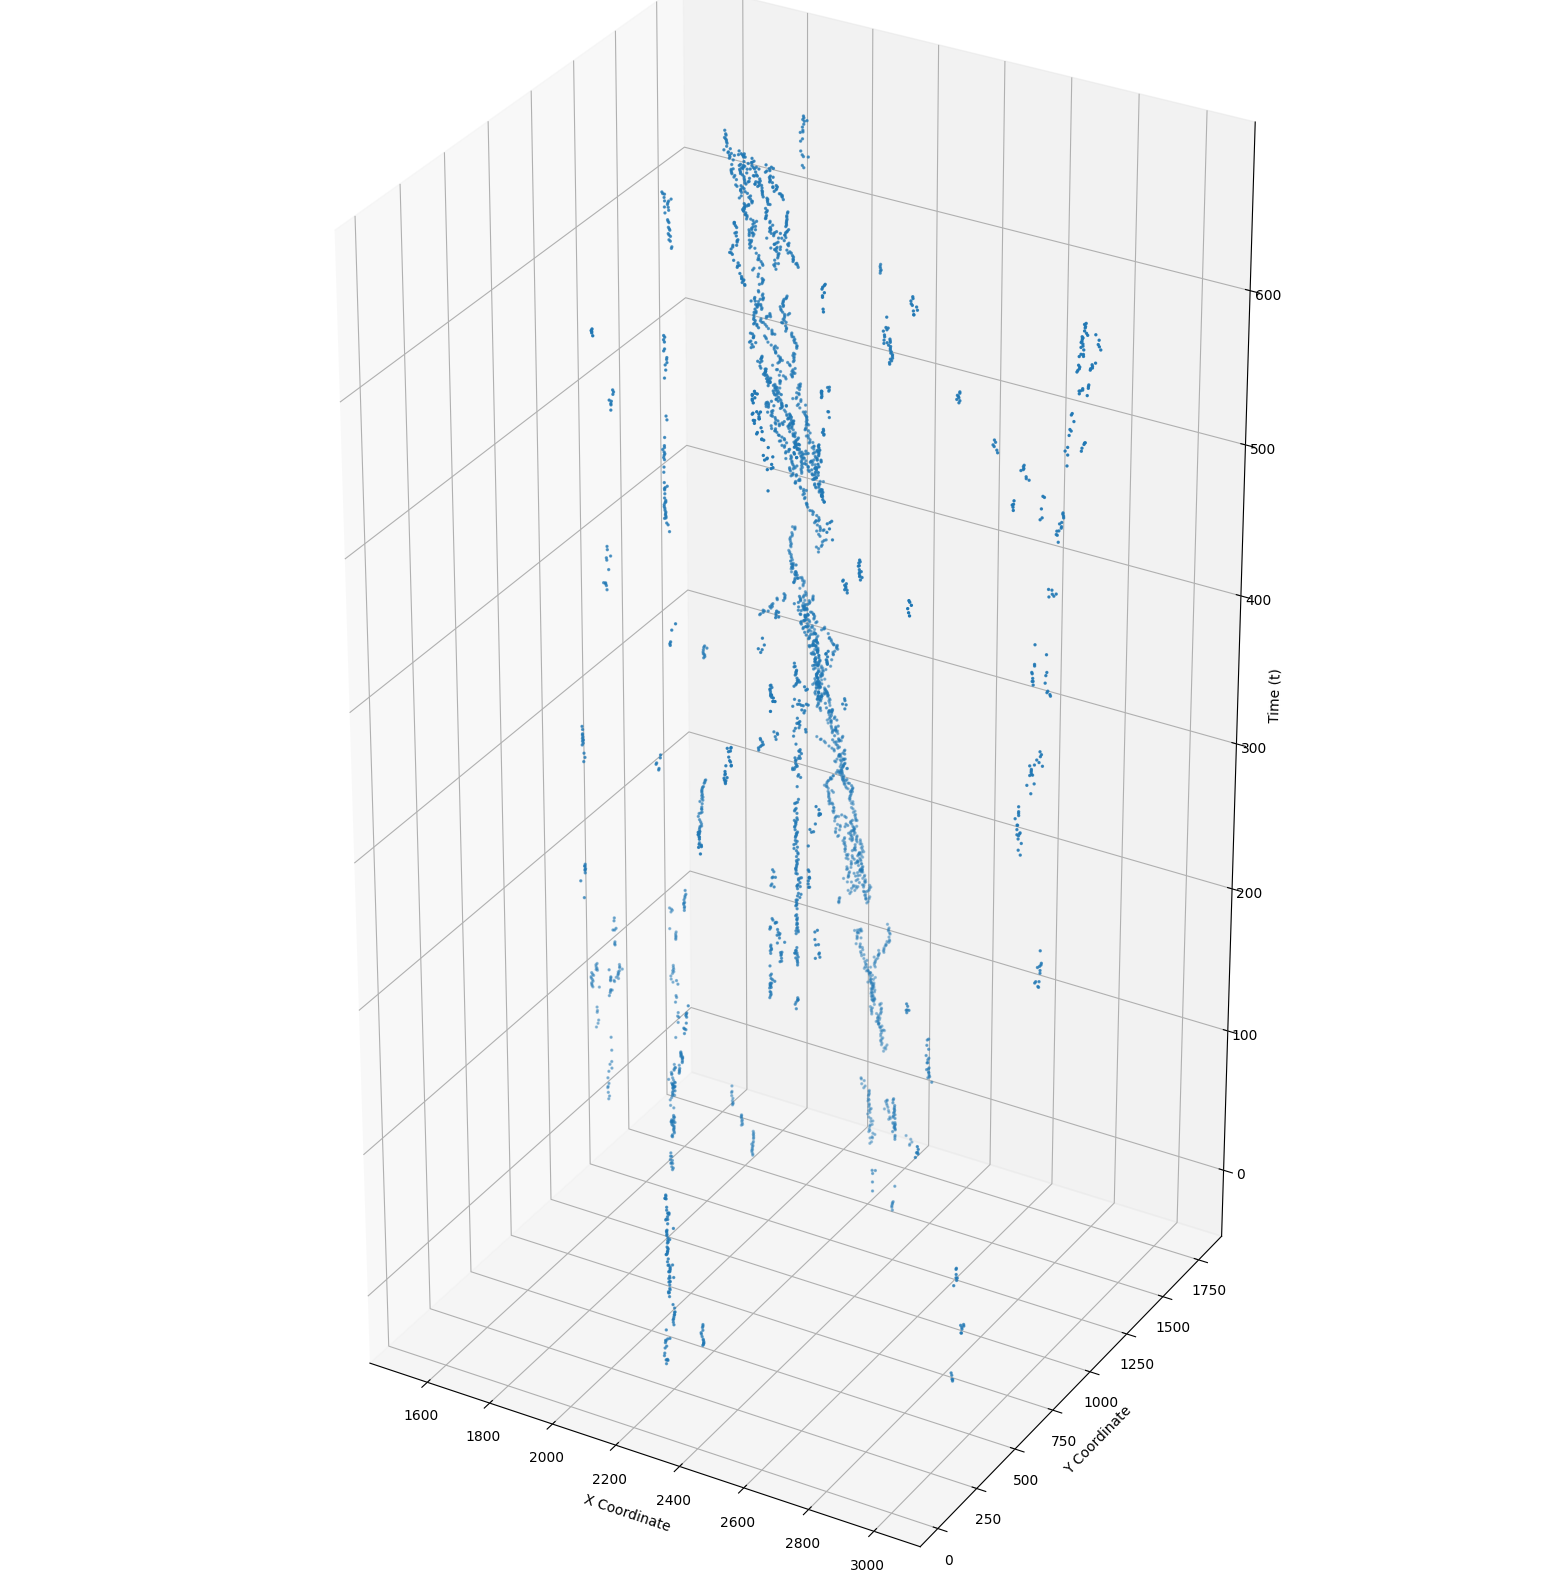

In [18]:
from sklearn.cluster import DBSCAN
time_list = []
x_list = []
y_list = []
for t, points in enumerate(pointList):
    for (x, y) in points:
        time_list.append(t)
        x_list.append(x)
        y_list.append(y)

# 获取工人活动范围的坐标范围
x_min, x_max = min(x_list), max(x_list)
y_min, y_max = min(y_list), max(y_list)

img_x_min = max(int(x_min),0)
img_x_max = int(x_max)
img_y_min = max(int(y_min),0)
img_y_max = int(y_max)

# 裁剪图像
cropped_img = img[img_y_min:img_y_max, img_x_min:img_x_max]

# 创建三维散点图
fig = plt.figure(figsize=(20, 20))
# ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')


# 将数据点转换为numpy数组
data = np.array(list(zip(time_list, x_list, y_list)))

# 使用DBSCAN算法进行聚类
db = DBSCAN(eps=15, min_samples=5).fit(data)
labels = db.labels_

# 过滤离群点，标签为-1的点是离群点
filtered_data = data[labels != -1]

# 获取过滤后的数据
time_list = filtered_data[:, 0]
x_list = filtered_data[:, 1]
y_list = filtered_data[:, 2]

# 设置轴标签
ax.set_zlabel('Time (t)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')


# 获取裁剪后图像的范围
cropped_x_range = np.linspace(x_min, x_max, cropped_img.shape[1])
cropped_y_range = np.linspace(y_min, y_max, cropped_img.shape[0])
xv, yv = np.meshgrid(cropped_x_range, cropped_y_range)

# 使用 plot_surface 在 xy 平面上绘制图像
plt.gca().set_box_aspect((4, 4, 8))

scatter = ax.scatter(x_list, y_list,time_list,  s=2)  # s 参数控制点的大小

# 显示图形
plt.show()
# plt.savefig("1.png")